## Iterative Verfahren

### Fixpunktiteration

Ein Beispiel aus der Rohrhydraulik:

Zur Bestimmung der [Rohrreibungszahl](https://de.wikipedia.org/wiki/Rohrreibungszahl) $\lambda$ kann bei glatten, turbulent durchströmten Rohren die implizite Formel von Prandtl verwendet werden:

$$\frac{1}{\sqrt\lambda} = 2\cdot\log\left(\text{Re}\cdot\sqrt\lambda\right) - 0,8$$

Mathe-Nerds lösen die Gleichung mithilfe der [Lambertschen W-Funktion](https://de.wikipedia.org/wiki/Lambertsche_W-Funktion), Ingenieure jedoch meist mit einem numerischen Verfahren.

Die Lösung für die Prandtl-Formel lässt sich grafisch als Schnittpunkt der linken und rechten Seite finden.  

Wir definieren für die linke und rechte Seite separat:

$$LHS\left(\lambda\right) = \frac{1}{\sqrt\lambda}$$

$$RHS\left(\lambda\right) = 2\cdot\log\left(\text{Re}\cdot\sqrt\lambda\right) - 0,8$$

Für eine Reynoldszahl $\text{Re} = 6,4\cdot 10^6$ ergeben sich dann folgende Kurvenverläufe:

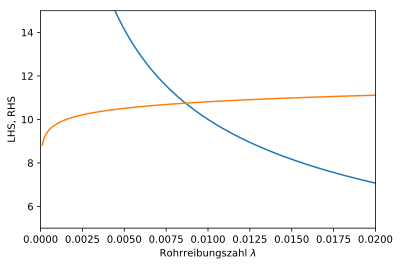

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# linke Seite der Gleichung (left hand side)
def LHS(lamb):
    return 1/np.sqrt(lamb)

# rechte Seite der Gleichung (right hand side)
def RHS(lamb, Re):
    return 2.0 * np.log10(Re * np.sqrt(lamb)) - 0.8

# Array mit äquidistanten Werten für lambda und Festlegen der Re-Zahl:
lamb = np.arange(0.0001, 0.05, 0.0001);
Re = 6.4e6

plt.plot(lamb, LHS(lamb))
plt.plot(lamb, RHS(lamb, Re))
plt.axis([0, 0.02, 5, 15])
plt.ylabel('LHS, RHS')
plt.xlabel('Rohrreibungszahl $\lambda$')
plt.show()

Als Lösung ("Fixpunkt"), bei dem linke und rechte Seite denselben Wert annehmen lässt sich für $\lambda$ ein Wert von etwa 0,008 ablesen.

Mithilfe einer Fixpunktiteration lässt sich dieser auch iterativ bestimmen. Hierzu formen wir die Prandtl-Formel so um, dass auf der linken Seite nur noch $\lambda$ steht:

$$\lambda = \frac{1}{\left[RHS\left(\lambda\right)\right]^2}$$

Damit lässt sich nun eine Iterationsvorschrift formulieren:

$$\lambda_{i+1} = \frac{1}{\left[RHS\left(\lambda_i\right)\right]^2}$$

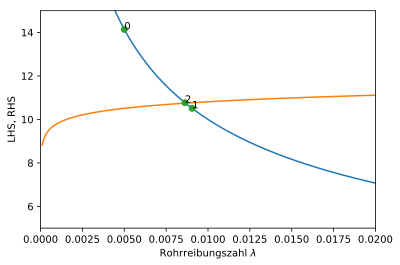

lambda =  0.00862274708597 , Fehler in %:  -0.195748076987


In [2]:
# Startwert für lambda:
lamb_alt = 0.005

# Liste, um Zwischenergebnisse zu speichern
lambda_i = []
lambda_i.append(lamb_alt)

# Fixpunkt-Algorithmus
for iteration in range(0, 2):
    lamb_neu = 1 / (RHS(lamb_alt, Re)**2)
    lambda_i.append(lamb_neu)
    lamb_alt = lamb_neu
    
fehler = (RHS(lamb_neu, Re)-LHS(lamb_neu)) / RHS(lamb_neu, Re)

plt.plot(lamb, LHS(lamb))
plt.plot(lamb, RHS(lamb, Re))
plt.plot(lambda_i, LHS(lambda_i), 'o')
for i, txt in enumerate(lambda_i):
    plt.annotate(i, (lambda_i[i], LHS(lambda_i[i])))
plt.axis([0, 0.02, 5, 15])
plt.ylabel('LHS, RHS')
plt.xlabel('Rohrreibungszahl $\lambda$')
plt.show()

print ("lambda = ", lamb_neu, ", Fehler in %: ", fehler*100)

### Newton-Verfahren

Das [Newton-Verfahren](https://de.wikipedia.org/wiki/Newton-Verfahren) ist eine weitere Möglichkeit, um Gleichungen iterativ zu lösen. Hierzu wird die Gleichung so umgestellt, dass sich das Problem in eine Nullstellensuche konvertiert. Die oben behandelte Rohrreibungsgleichung ergibt dann:

$$f(\lambda) = \frac{1}{\sqrt\lambda} - 2\cdot\log\left(\text{Re}\cdot\sqrt\lambda\right) - 0,8 = 0$$

Ausgehend von einem geschätzten Startwert für die Nullstelle $\lambda_i$ wird die Steigung $f'(\lambda_i)$ der Funktion berechnet. Die Tangente im Punkt $(\lambda_i,f(\lambda_i))$ ist dann:

$$t(\lambda) = f(\lambda_i) + f'(\lambda_i)\cdot (\lambda - \lambda_i)$$

Der Schnittpunkt dieser Tangente mit der $\lambda$-Achse ergibt den neuen Näherungswert für die Nullstelle und damit die Iterationsvorschrift:

$$\lambda_{i+1} = \lambda_i - \frac{f(\lambda_i)}{f'(\lambda_i)}$$

Im Beispiel mit der Rohrreibungsgleichung ist die Ableitung:

$$f'(\lambda) = -\frac{1}{2\cdot\lambda^{3/2}} - \frac{1}{\lambda}$$

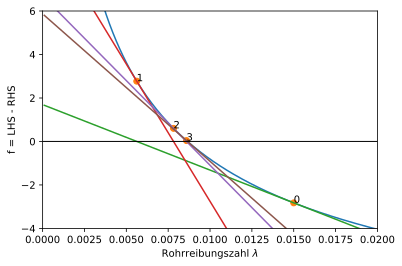

lambda =  0.00859397891809 , Fehler in %:  -0.376864027016


In [3]:
# Startwert für lambda:
lamb_alt = 0.015

# Liste, um Zwischenergebnisse zu speichern
lambda_newton_i = []
lambda_newton_i.append(lamb_alt)

# die Funktion f
def f(lamb, Re):
    return 1/np.sqrt(lamb) - 2.0 * np.log10(Re * np.sqrt(lamb)) + 0.8

# die Ableitung von f
def f_strich(lamb):
    return -1/(2*lamb**1.5) - 1/(lamb*math.log(10))

# die Tangente an f (nur zur Visualisierung, wird eigentlich nicht benötigt)
def tangente_f(x, lamb, Re):
    return f(lamb,Re)+f_strich(lamb)*(x-lamb)

# Newton-Verfahren:
for iteration in range(0, 3):
    lamb_neu = lamb_alt - f(lamb_alt, Re)/f_strich(lamb_alt)
    lambda_newton_i.append(lamb_neu)
    lamb_alt = lamb_neu

fehler = (RHS(lamb_neu, Re)-LHS(lamb_neu)) / RHS(lamb_neu, Re)

# Ergebnisse im Diagramm darstellen:
plt.plot(lamb, f(lamb, Re))
plt.plot(lambda_newton_i, f(lambda_newton_i, Re), 'o')
for i, txt in enumerate(lambda_newton_i):
    plt.annotate(i, (lambda_newton_i[i], f(lambda_newton_i[i], Re)))
    plt.plot(lamb, tangente_f(lamb, lambda_newton_i[i], Re))
plt.plot([0,0.02],[0,0],'k', linewidth=1)
plt.axis([0, 0.02, -4, 6])
plt.ylabel('f = LHS - RHS')
plt.xlabel('Rohrreibungszahl $\lambda$')
plt.show()

print ("lambda = ", lamb_neu, ", Fehler in %: ", fehler*100)

### Verfahren zur Lösung von Gleichungssystemen

Weitere Verfahren, zur Lösung von ganzen Gleichungssystemen werden in Kapitel 4 vorgestellt. Diese Verfahren werden z.B. verwendet, um die riesigen Gleichungssysteme zu lösen, die bei der Diskretisierung von Transportgleichungen mithilfe der Finite-Differenzen- (FDM), Finite-Elemente- (FEM) oder Finite-Volumen-Methode (FVM) entstehen. 

Prominente Vertreter sind das Gauß-Verfahren (Gauß-Seidel-Verfahren) und der Thomas-Algorithmus.

[Hier](1_3-Numerik - Anfangswertaufgaben.ipynb) geht's weiter.


---
Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()